<a href="https://colab.research.google.com/github/japheth-kasomo/Modelling-using-R/blob/main/hakathorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter Notebook: AIMS Data Science Hackathon by Microsoft

Welcome! This starter notebook is designed to get you started on the AIMS Data Science Hackathon, where you will be attempting to predict a measure of wealth for different locations across Africa. We will take a look at the data, create a model and then use that to make our first submission. After that we will briefly look at some ways to improve. Let's get started.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/MyDrive/Colab Notebooks/dataset"

/content/drive/MyDrive/Colab Notebooks/dataset


# Loading the Data

We're using the pandas library to load the data into dataframes - a tabular data structure that is perfect for this kind of work. Each of the three CSV files from Zindi is loaded into a dataframe and we take a look at the shape of the data (number of rows and columns) as well as a preview of the first 5 rows to get a feel for what we're working with.

In [ ]:
#!pip install fastai

In [5]:
#from fastai.tabular.data import *
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

In [22]:
train = pd.read_csv('Train_Cleaned.csv')
print(train.shape)
train.head()
train.drop("Unnamed: 0",axis=1,inplace=True)

(2977, 75)


In [26]:
train.drop("Field_ID",axis=1,inplace=True)

In [27]:
train.shape

(2977, 73)

In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [31]:
test = pd.read_csv('Test_Cleaned.csv')
print(test.shape)


(1055, 73)


In [33]:
test.drop("Unnamed: 0",axis=1,inplace=True)
test.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,1_CLIM_pr,1_CLIM_soil,2_S2_B5,2_S2_B4,2_S2_B3,2_S2_B2,2_CLIM_pr,2_CLIM_soil,3_S2_B5,3_S2_B4,3_S2_B3,3_S2_B2,3_CLIM_pr,3_CLIM_soil,4_S2_B5,4_S2_B4,4_S2_B3,4_S2_B2,4_CLIM_pr,4_CLIM_soil,5_S2_B5,5_S2_B4,5_S2_B3,5_S2_B2,5_CLIM_pr,5_CLIM_soil,6_S2_B5,6_S2_B4,6_S2_B3,6_S2_B2,6_CLIM_pr,6_CLIM_soil,7_S2_B5,7_S2_B4,7_S2_B3,7_S2_B2,7_CLIM_pr,7_CLIM_soil,8_S2_B5,8_S2_B4,8_S2_B3,8_S2_B2,8_CLIM_pr,8_CLIM_soil,9_S2_B5,9_S2_B4,9_S2_B3,9_S2_B2,9_CLIM_pr,9_CLIM_soil,10_S2_B5,10_S2_B4,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,920,987,781,1252,32,326,958,991,1198,1361,33,226,1052,1162,1433,1664,51,175,5355,5049,5053,5312,184,433,854,877,806,1068,152,539,1503,1450,1182,1583,63,294,882,907,630,1064,43,211,1023,1121,1249,1508,78,166,801,712,673,895,70,138,1029,1187,1499,1700,178,488,811,839,555,934,124,435,922,944,697,1121,157,618
1,899,928,696,1129,32,326,970,972,1001,1265,33,226,957,1025,954,1405,51,175,972,989,971,1372,184,433,857,879,551,932,152,539,1672,1642,1484,1724,63,294,918,938,804,1035,43,211,914,955,781,1138,78,166,982,1012,756,1308,70,138,874,948,710,1245,178,488,927,1000,643,1214,124,435,900,879,629,1034,157,618
2,966,1019,960,1299,32,316,874,778,861,1015,33,220,937,919,1137,1262,52,170,900,894,1046,1182,188,453,777,723,524,754,154,574,1704,1641,1404,1690,64,308,858,804,559,828,42,216,904,878,1003,1059,77,168,989,944,1121,1228,66,139,863,854,944,1068,180,506,880,849,573,922,124,448,890,872,593,962,153,583
3,923,1032,672,1191,32,316,1066,1107,930,1271,33,220,961,1030,921,1246,52,170,1010,1071,1087,1305,188,453,970,1083,709,1214,154,574,1535,1467,1192,1565,64,308,1028,1051,739,1260,42,216,1008,1068,905,1231,77,168,1778,1847,1819,2045,66,139,913,1078,759,1240,180,506,1219,1208,823,1265,124,448,998,1099,736,1165,153,583
4,987,1047,1343,1441,32,316,949,991,1262,1273,33,220,1090,1246,1705,1829,52,170,1103,1286,1799,1698,188,453,848,874,688,1004,154,574,966,973,730,1152,64,308,873,822,541,900,42,216,1071,1170,1363,1421,77,168,1019,1111,1426,1541,66,139,982,1097,1405,1369,180,506,943,1025,879,1162,124,448,893,921,574,986,153,583


Test looks just like train but without the 'Target' column and with fewer rows.

In [34]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(1055, 2)


,Field_ID,Yield
0,E9UZCEA,0
1,1WGGS1Q,0
2,EG2KXE2,0
3,HC3GQXF,0
4,7AK6GFK,0


The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

First up: let's see how an input like 'nighttime lights' relates to the target column:

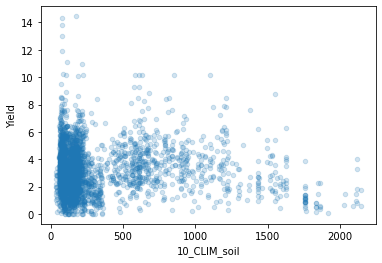

In [36]:
# Plotting the relationship between an input column and the target
train.plot(x='10_CLIM_soil', y='Yield', kind='scatter', alpha=0.2)

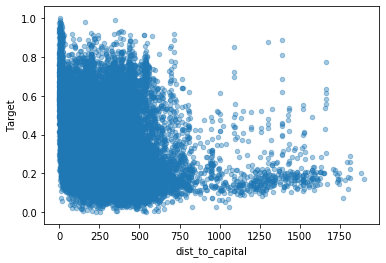

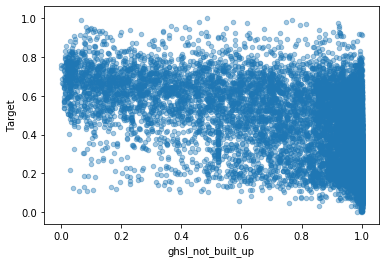

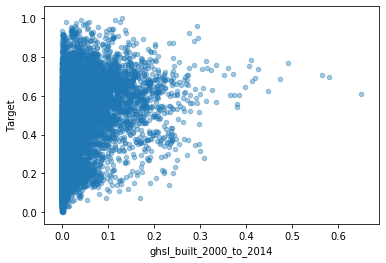

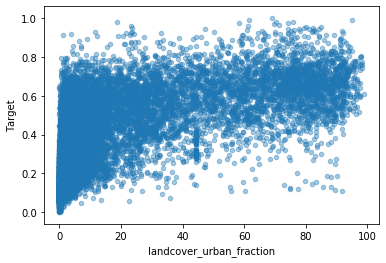

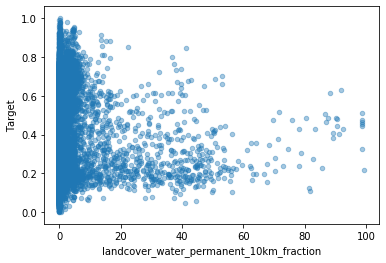

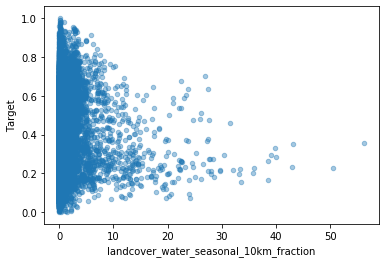

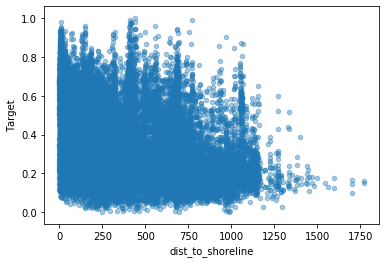

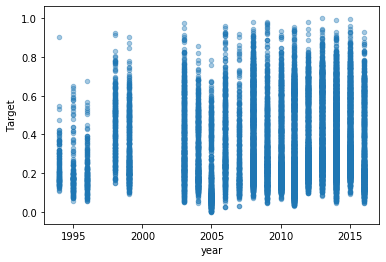

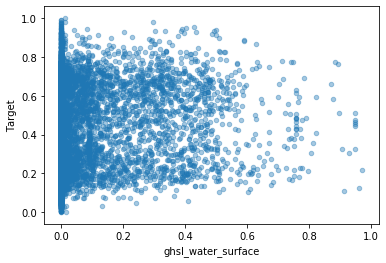

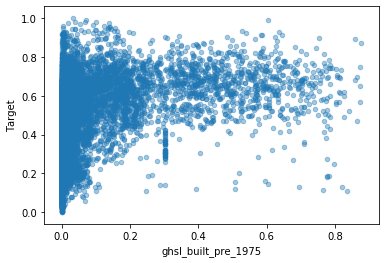

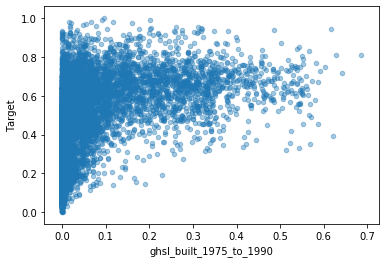

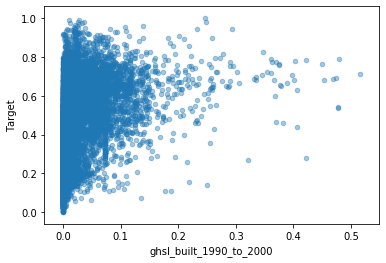

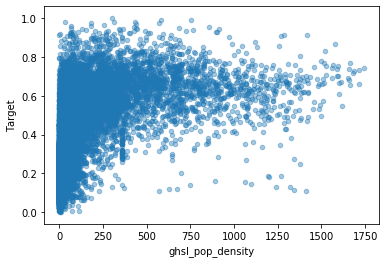

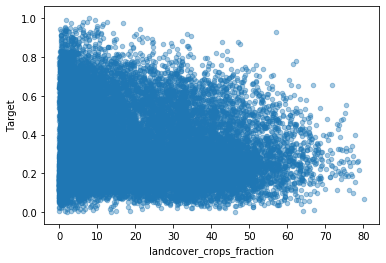

In [ ]:
# Exercise: Try this with different inputs. Any unexpected trends?
train.plot(x='dist_to_capital', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_not_built_up', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_2000_to_2014', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_urban_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_water_permanent_10km_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_water_seasonal_10km_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='dist_to_shoreline', y='Target', kind='scatter', alpha=0.4)
train.plot(x='year', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_water_surface', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_pre_1975', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_1975_to_1990', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_1990_to_2000', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_pop_density', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_crops_fraction', y='Target', kind='scatter', alpha=0.4)

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

In [37]:
train.columns

Index(['0_S2_B5', '0_S2_B4', '0_S2_B3', '0_S2_B2', '0_CLIM_pr', '0_CLIM_soil',
       '1_S2_B5', '1_S2_B4', '1_S2_B3', '1_S2_B2', '1_CLIM_pr', '1_CLIM_soil',
       '2_S2_B5', '2_S2_B4', '2_S2_B3', '2_S2_B2', '2_CLIM_pr', '2_CLIM_soil',
       '3_S2_B5', '3_S2_B4', '3_S2_B3', '3_S2_B2', '3_CLIM_pr', '3_CLIM_soil',
       '4_S2_B5', '4_S2_B4', '4_S2_B3', '4_S2_B2', '4_CLIM_pr', '4_CLIM_soil',
       '5_S2_B5', '5_S2_B4', '5_S2_B3', '5_S2_B2', '5_CLIM_pr', '5_CLIM_soil',
       '6_S2_B5', '6_S2_B4', '6_S2_B3', '6_S2_B2', '6_CLIM_pr', '6_CLIM_soil',
       '7_S2_B5', '7_S2_B4', '7_S2_B3', '7_S2_B2', '7_CLIM_pr', '7_CLIM_soil',
       '8_S2_B5', '8_S2_B4', '8_S2_B3', '8_S2_B2', '8_CLIM_pr', '8_CLIM_soil',
       '9_S2_B5', '9_S2_B4', '9_S2_B3', '9_S2_B2', '9_CLIM_pr', '9_CLIM_soil',
       '10_S2_B5', '10_S2_B4', '10_S2_B3', '10_S2_B2', '10_CLIM_pr',
       '10_CLIM_soil', '11_S2_B5', '11_S2_B4', '11_S2_B3', '11_S2_B2',
       '11_CLIM_pr', '11_CLIM_soil', 'Yield'],
      dtype='object')

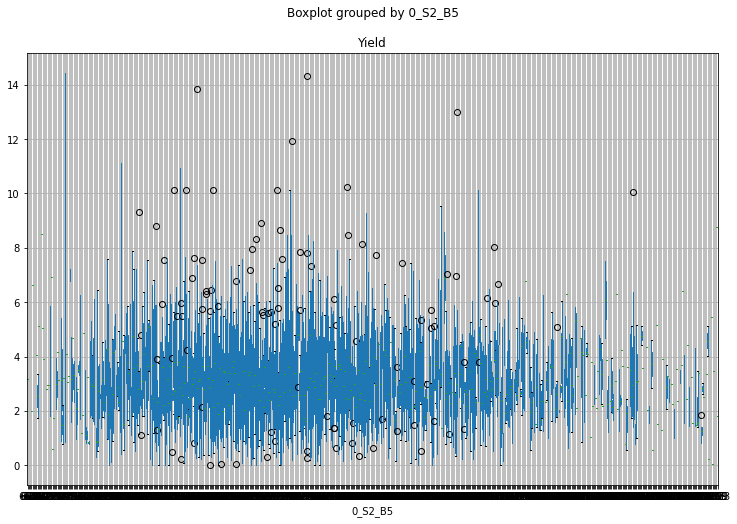

In [38]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='0_S2_B5', column='Yield', figsize=(12, 8))

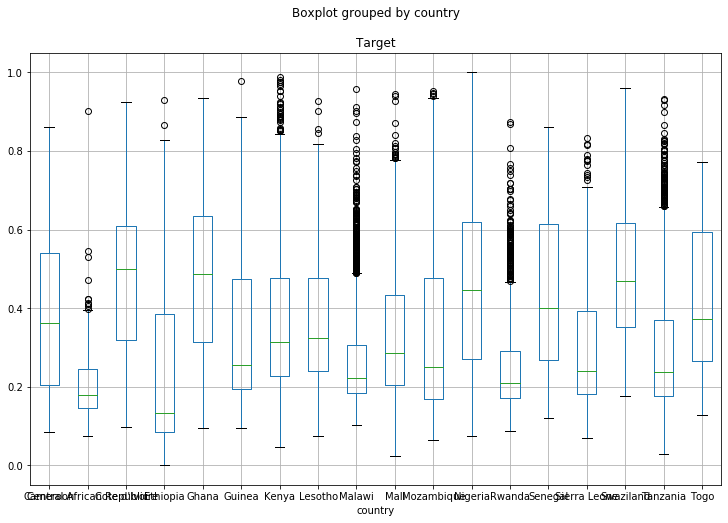

In [ ]:
 # Exercise: which is the country with the higest average wealth_index according to this dataset?
train.boxplot(by='country', column='Target', figsize=(12, 8))

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [39]:
train.isna().sum() # Hooray - no missing data!

0_S2_B5         0
0_S2_B4         0
0_S2_B3         0
0_S2_B2         0
0_CLIM_pr       0
               ..
11_S2_B3        0
11_S2_B2        0
11_CLIM_pr      0
11_CLIM_soil    0
Yield           0
Length: 73, dtype: int64

See what other trends you can uncover - we have only scratched the surface here. 

In [12]:
# Exercise: explore the data further
train.describe()

,Unnamed: 0,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,1_CLIM_pr,1_CLIM_soil,2_S2_B5,2_S2_B4,2_S2_B3,2_S2_B2,2_CLIM_pr,2_CLIM_soil,3_S2_B5,3_S2_B4,3_S2_B3,3_S2_B2,3_CLIM_pr,3_CLIM_soil,4_S2_B5,4_S2_B4,4_S2_B3,4_S2_B2,4_CLIM_pr,4_CLIM_soil,5_S2_B5,5_S2_B4,5_S2_B3,5_S2_B2,5_CLIM_pr,5_CLIM_soil,6_S2_B5,6_S2_B4,6_S2_B3,6_S2_B2,6_CLIM_pr,6_CLIM_soil,7_S2_B5,7_S2_B4,7_S2_B3,7_S2_B2,7_CLIM_pr,7_CLIM_soil,8_S2_B5,8_S2_B4,8_S2_B3,8_S2_B2,8_CLIM_pr,8_CLIM_soil,9_S2_B5,9_S2_B4,9_S2_B3,9_S2_B2,9_CLIM_pr,9_CLIM_soil,10_S2_B5,10_S2_B4,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.00000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,1488.000000,970.634531,1000.895532,1059.966073,1364.898556,40.074908,414.399395,1059.962378,1058.724219,1162.097749,1389.001680,56.952973,265.665771,1425.072556,1435.57306,1593.702049,1808.214310,66.524689,213.554585,1432.941888,1429.508566,1464.097414,1723.067854,223.510245,629.469936,1049.984884,1056.034263,860.386631,1207.757810,129.679879,637.489083,1095.688949,1087.319449,889.255626,1235.033591,60.396708,425.572724,1139.215989,1119.171985,969.035606,1290.116896,40.127309,302.509909,1023.161572,1030.583473,959.127309,1263.784683,83.352704,259.968760,1132.055761,1156.253275,1127.390326,1454.256970,90.030568,228.085657,1219.774605,1262.487739,1204.574068,1551.627141,114.158885,333.327511,1125.408801,1157.808532,1021.063823,1385.522674,123.483708,309.247565,1168.138058,1186.315754,1149.464562,1471.920390,57.612697,344.018139,3.174361
std,859.530201,154.897766,176.177435,324.646515,273.836622,33.174819,298.991173,534.632225,527.087315,590.996732,573.594101,44.496373,150.274534,1386.610561,1343.67331,1431.163044,1393.507478,33.972863,136.414616,1038.895844,994.835619,1046.801389,997.901646,91.798612,440.585598,797.379629,786.305377,896.909691,849.731847,75.544422,463.038491,751.389392,732.012578,820.834775,772.470978,74.926044,331.999017,803.611656,791.242526,890.971497,837.665110,27.688460,260.113057,537.631463,532.503204,615.459752,579.348864,48.673802,263.704928,746.336644,727.574494,808.135701,762.483669,31.251926,249.177926,984.965389,952.384574,1060.954476,980.642940,72.971580,409.227329,623.856807,600.672238,675.453756,628.216628,51.155793,370.074284,780.597442,752.853177,816.561022,775.167325,66.494326,432.807732,1.741751
min,0.000000,665.000000,512.000000,324.000000,389.000000,0.000000,73.000000,664.000000,497.000000,384.000000,389.000000,2.000000,69.000000,654.000000,587.00000,402.000000,458.000000,2.000000,63.000000,663.000000,470.000000,341.000000,329.000000,47.000000,59.000000,555.000000,370.000000,207.000000,223.000000,27.000000,55.000000,678.000000,535.000000,345.000000,407.000000,2.000000,51.000000,701.000000,497.000000,319.000000,355.000000,2.000000,48.000000,596.000000,435.000000,245.000000,296.000000,2.000000,46.000000,643.000000,467.000000,314.000000,346.000000,3.000000,43.000000,640.000000,498.000000,310.000000,395.000000,34.000000,41.000000,671.000000,512.000000,329.000000,398.000000,21.000000,39.000000,633.000000,451.000000,273.000000,303.000000,4.000000,38.00

In [40]:
train.dtypes

0_S2_B5           int64
0_S2_B4           int64
0_S2_B3           int64
0_S2_B2           int64
0_CLIM_pr         int64
                 ...   
11_S2_B3          int64
11_S2_B2          int64
11_CLIM_pr        int64
11_CLIM_soil      int64
Yield           float64
Length: 73, dtype: object

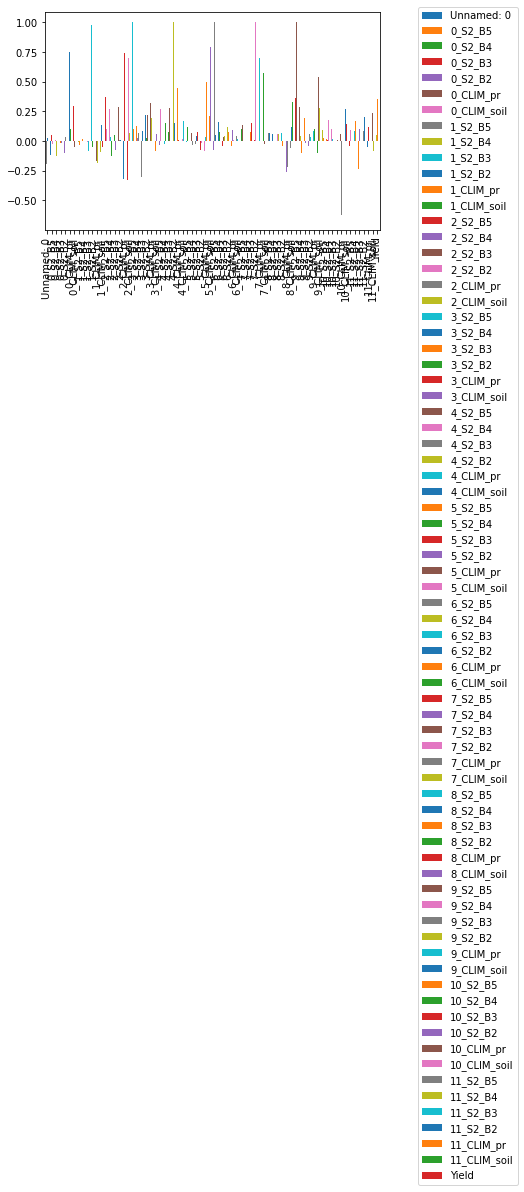

In [14]:
#Correlation bar plot
correlation = train.corr()
correlation.plot(kind='bar')
plt.legend(bbox_to_anchor = (1.1,1.05))

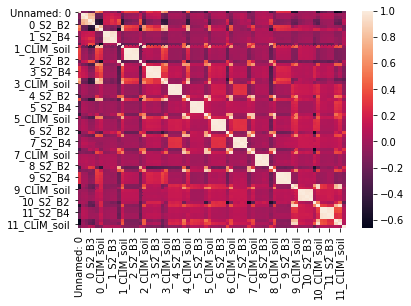

In [15]:
#Correlation matrix plot
sn.heatmap(correlation,annot=False)

# Modelling

We've had a look at our data and it looks good! Let's see if we can create a model to predict the Target given some of our inputs. To start with we will use only the numeric columns, so that we can fit a model right away. 

In [17]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['0_S2_B2', '0_CLIM_pr', '0_CLIM_soil', '1_S2_B5', '1_S2_B4', '1_S2_B3', '1_S2_B2', '1_CLIM_pr', '1_CLIM_soil', '2_S2_B5', '2_S2_B4', '2_S2_B3', '2_S2_B2', '2_CLIM_pr', '2_CLIM_soil', '3_S2_B5', '3_S2_B4', '3_S2_B3', '3_S2_B2', '3_CLIM_pr', '3_CLIM_soil', '4_S2_B5', '4_S2_B4', '4_S2_B3', '4_S2_B2', '4_CLIM_pr', '4_CLIM_soil', '5_S2_B5', '5_S2_B4', '5_S2_B3', '5_S2_B2', '5_CLIM_pr', '5_CLIM_soil', '6_S2_B5', '6_S2_B4', '6_S2_B3', '6_S2_B2', '6_CLIM_pr', '6_CLIM_soil', '7_S2_B5', '7_S2_B4', '7_S2_B3', '7_S2_B2', '7_CLIM_pr', '7_CLIM_soil', '8_S2_B5', '8_S2_B4', '8_S2_B3', '8_S2_B2', '8_CLIM_pr', '8_CLIM_soil', '9_S2_B5', '9_S2_B4', '9_S2_B3', '9_S2_B2', '9_CLIM_pr', '9_CLIM_soil', '10_S2_B5', '10_S2_B4', '10_S2_B3', '10_S2_B2', '10_CLIM_pr', '10_CLIM_soil', '11_S2_B5', '11_S2_B4', '11_S2_B3', '11_S2_B2', '11_CLIM_pr', '11_CLIM_soil', 'Field_ID']


To evaluate our model, we need to keep some data separate. We will split out data into X (inputs) and y (output) and then further split into train and test sets with the following code:

In [43]:
len(train.columns)

73

In [128]:
from sklearn.model_selection import train_test_split
X,y = train.iloc[:,0:72], train['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) # Random state keeps the split consistent
print(X_train.shape, X_test.shape)

(2381, 72) (596, 72)


We now have a nice test set of ~4200 rows. We will train our model and then use this test set to calculate our score.

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


#SPILITING  DATASET
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [130]:
model = RandomForestRegressor(n_estimators = 200,random_state = 68) # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score



Multi_lr  = LinearRegression()
Multi_lr.fit(X_train, y_train)

DTR   = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train, y_train)

SVR_lr = SVR(C=1.0,epsilon=0.2,gamma='scale')
SVR_lr.fit(X_train, y_train)



RaFR  = RandomForestRegressor(n_estimators=10,max_depth=4,random_state=0)
RaFR.fit(X_train, y_train)

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [131]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)


[15:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [132]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
print(f"RFR {mean_squared_error(y_test, model.predict(X_test), squared=False)}")
print(f"Multi_lr {mean_squared_error(y_test, Multi_lr.predict(X_test), squared=False)}")
print(f"DTR {mean_squared_error(y_test, DTR.predict(X_test), squared=False)}")
print(f"SVR_lr {mean_squared_error(y_test, SVR_lr.predict(X_test), squared=False)}")
print(f"RaFR {mean_squared_error(y_test, RaFR.predict(X_test), squared=False)}")

print(f"XGBoost {mean_squared_error(y_test, xg_reg.predict(X_test), squared=False)}")

RFR 1.4931524475184494
Multi_lr 1.4747377908947241
DTR 2.2038782862490263
SVR_lr 1.550911161704121
RaFR 1.5110032083066909
XGBoost 1.673473846384016


In [48]:
#from sklearn import metrics
#print("Accuracy=",metrics.accuracy_score(y_test,prediction_test))
max(model.predict(X_test))


6.703696250000006

What is the score above? The default for regression models is the R^2 score, a measure of how well the mode does at predicting the target. 0.69 is pretty good - let's plot the predictions vs the actual values and see how close it looks to a straight line:

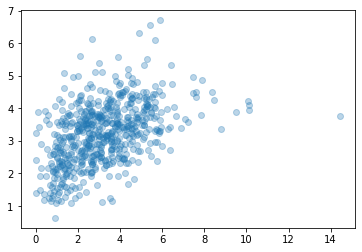

In [49]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

This looks great - most predictions are nice and close to the true value! But we still don't have a way to link this to the leaderboard score on Zindi. Let's remedy that by calculating the Root Mean Squared Error, the same metric Zindi uses. 

Great stuff. Let's make a submission and then move on to looking for ways to improve.

In [53]:
test.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,1_CLIM_pr,1_CLIM_soil,2_S2_B5,2_S2_B4,2_S2_B3,2_S2_B2,2_CLIM_pr,2_CLIM_soil,3_S2_B5,3_S2_B4,3_S2_B3,3_S2_B2,3_CLIM_pr,3_CLIM_soil,4_S2_B5,4_S2_B4,4_S2_B3,4_S2_B2,4_CLIM_pr,4_CLIM_soil,5_S2_B5,5_S2_B4,5_S2_B3,5_S2_B2,5_CLIM_pr,5_CLIM_soil,6_S2_B5,6_S2_B4,6_S2_B3,6_S2_B2,6_CLIM_pr,6_CLIM_soil,7_S2_B5,7_S2_B4,7_S2_B3,7_S2_B2,7_CLIM_pr,7_CLIM_soil,8_S2_B5,8_S2_B4,8_S2_B3,8_S2_B2,8_CLIM_pr,8_CLIM_soil,9_S2_B5,9_S2_B4,9_S2_B3,9_S2_B2,9_CLIM_pr,9_CLIM_soil,10_S2_B5,10_S2_B4,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,920,987,781,1252,32,326,958,991,1198,1361,33,226,1052,1162,1433,1664,51,175,5355,5049,5053,5312,184,433,854,877,806,1068,152,539,1503,1450,1182,1583,63,294,882,907,630,1064,43,211,1023,1121,1249,1508,78,166,801,712,673,895,70,138,1029,1187,1499,1700,178,488,811,839,555,934,124,435,922,944,697,1121,157,618
1,899,928,696,1129,32,326,970,972,1001,1265,33,226,957,1025,954,1405,51,175,972,989,971,1372,184,433,857,879,551,932,152,539,1672,1642,1484,1724,63,294,918,938,804,1035,43,211,914,955,781,1138,78,166,982,1012,756,1308,70,138,874,948,710,1245,178,488,927,1000,643,1214,124,435,900,879,629,1034,157,618
2,966,1019,960,1299,32,316,874,778,861,1015,33,220,937,919,1137,1262,52,170,900,894,1046,1182,188,453,777,723,524,754,154,574,1704,1641,1404,1690,64,308,858,804,559,828,42,216,904,878,1003,1059,77,168,989,944,1121,1228,66,139,863,854,944,1068,180,506,880,849,573,922,124,448,890,872,593,962,153,583
3,923,1032,672,1191,32,316,1066,1107,930,1271,33,220,961,1030,921,1246,52,170,1010,1071,1087,1305,188,453,970,1083,709,1214,154,574,1535,1467,1192,1565,64,308,1028,1051,739,1260,42,216,1008,1068,905,1231,77,168,1778,1847,1819,2045,66,139,913,1078,759,1240,180,506,1219,1208,823,1265,124,448,998,1099,736,1165,153,583
4,987,1047,1343,1441,32,316,949,991,1262,1273,33,220,1090,1246,1705,1829,52,170,1103,1286,1799,1698,188,453,848,874,688,1004,154,574,966,973,730,1152,64,308,873,822,541,900,42,216,1071,1170,1363,1421,77,168,1019,1111,1426,1541,66,139,982,1097,1405,1369,180,506,943,1025,879,1162,124,448,893,921,574,986,153,583


In [134]:
# Load the sample submission file
ss = pd.read_csv('SampleSubmission.csv')

# Prep the data, using the same method we did for train
#test_sampled = pd.DataFrame([process_im(fid, folder='image_arrays_test') for fid in ss['Field_ID'].values])

# Get model predictions
preds = Multi_lr.predict(test)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('Sub.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,3.581641
1,1WGGS1Q,3.262423
2,EG2KXE2,3.286977
3,HC3GQXF,2.870481
4,7AK6GFK,3.190660


We now have our predictions in the right format to submit. The following line saves this to a file that you can then upload to get a score:

In [59]:
ss.to_csv('Sub.csv', index=False)

# Getting Better

You might have noticed that your score on Zindi wasn't as good as the one you got above. This is because the test set comes from different countries to the train set. When we did a random split, we ended up with our local train and test both coming from the same countries - and it's easier for a model to extrapolate within countries than it is for it to make predictions for a new location. 

So our first step might be to make a scoring function that splits the data according to country, and measures the model performance on unseen countries. Try it and share your testing methods in the discussions. And look at the following questions:
- Does your score drop when you score your model on countries it wasn't trained with?
- Does the new score more accurately match the leaderboard score?
- Are any countries particularly 'hard' to make predictions in?

In [ ]:
# You code for a new model evaluation method here
# create our instances

import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
#boston = load_boston()
train = pd.read_csv('Train.csv')
print(train.shape)
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgbr = xgb.XGBRegressor(n_estimators = 300,learning_rate = 1,early_stopping_rounds = 15,verbosity=0)
print(xgbr)

xgbr.fit(X_train, y_train)
 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 



(21454, 19)
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             early_stopping_rounds=15, gamma=None, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=0)
Training score:  0.9909373655043877


Mean cross-validation score: 0.52
K-fold CV average score: 0.50
MSE: 0.02
RMSE: 0.14


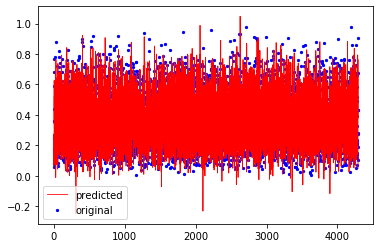

In [ ]:
# - cross validataion 
scores = cross_val_score(xgbr, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=3, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [ ]:
xgbr.predict(X_test)

array([0.23802774, 0.1737499 , 0.2729197 , ..., 0.13420084, 0.17192945,
       0.3558278 ], dtype=float32)

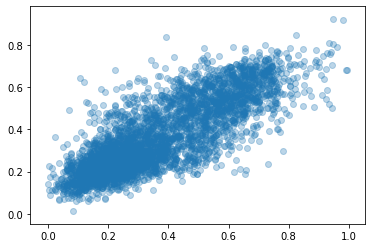

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, xgbr.predict(X_test), alpha=0.3)

In [ ]:
ss['Target'] = xgbr.predict(test[in_cols]) 
ss.head(20)

,ID,Target
0,ID_AAcismbB,0.188604
1,ID_AAeBMsji,0.130424
2,ID_AAjFMjzy,0.503703
3,ID_AAmMOEEC,0.341065
4,ID_ABguzDxp,0.281510
5,ID_ABomWihE,0.163277
6,ID_ACDBDjVC,0.138776
7,ID_AEnEBaEk,0.270565
8,ID_AFDiXCWE,0.136636
9,ID_AFFdlZrY,0.227215


In [ ]:
ss.to_csv('first_submission2.csv', index=False)

In [ ]:
#model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
#model.fit(X_train, y_train)
#model.score(X_test,y_test)
#0.82702702702702702

Knowing how well our model is doing is useful, but however you measure that we also need ways to improve this performance! There are a few ways to do this:

- Feed the model better data. How? Feature engineering! If we can add meaningful features the model will have more data to work with.
- Tune your models. We used the default parameters - perhaps we can tweak some hyperparameters to make our models better
- Try fancier models. Perhaps XGBoost or a neural network is better than Random Forest at this task

Let's do a little of each. First up, let's create a numeric feature that encodes the 'urban_or_rural' column as something the model can use:

In [ ]:
# Turning a categorical column into a numeric feature
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,is_urban
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783,0
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898,0
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320,0
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107,0
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328,1



Note that whenever we add features to train, *we also need to add them to test* otherwise we won't be able to make our predictions.

With this extra feature, we can fit a new model:

In [ ]:
in_cols.append('is_urban') # Adding the new features to our list of input columns

# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)
model = RandomForestRegressor(n_estimators = 200,random_state = 58)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.10412910409671342

In [ ]:
model.score(X_test, y_test)

0.7207227854834007

In [ ]:
model.predict(X_test)

array([0.31792478, 0.23912492, 0.29551106, ..., 0.24068028, 0.22825469,
       0.50919479])

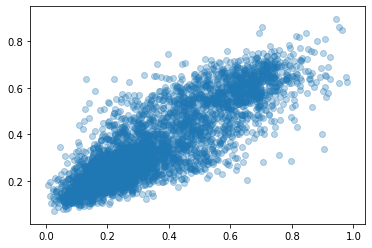

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

In [ ]:
ss['Target'] = model.predict(test[in_cols]) 
ss.head(20)

,ID,Target
0,ID_AAcismbB,0.151233
1,ID_AAeBMsji,0.220873
2,ID_AAjFMjzy,0.621344
3,ID_AAmMOEEC,0.386139
4,ID_ABguzDxp,0.243781
5,ID_ABomWihE,0.193998
6,ID_ACDBDjVC,0.164680
7,ID_AEnEBaEk,0.328109
8,ID_AFDiXCWE,0.160593
9,ID_AFFdlZrY,0.193995


In [ ]:
ss.to_csv('first_submission16.csv', index=False)

Did your score improve?

Next, let's tune our model by adjusting the maximum depth. This is one of many hyperparameters that can be tweaked on a Random Forest model. Here I just try a few randomly chosen values, but you could also use a grid search to try values more methodically.

In [ ]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

3 0.10440691490454755
5 0.10446422171614196
8 0.10449141183250929
10 0.10439394483295834
14 0.10421224332327052
18 0.10459235214554277


In this case, it looks like we can improve our performance by specifying a max_depth to limit model complexity.

Finally, let's try a different model out of curiosity:

In [102]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
# Exercise: fit and score the model. Does it beat your other scores? Can you use it to make a submission?

ModuleNotFoundError: ignored

Remember, you can ask questions and share ideas in the discussions. 

### GOOD LUCK!

In [ ]:
#Explore the data further
#plot.figure(figsize=(7,7))
train.dtypes
train.describe()

In [ ]:
correlation = train.corr()
correlation.plot(kind='bar')
plt.legend(bbox_to_anchor = (1.1,1.05))

In [ ]:
sn.heatmap(correlation,annot=False)

In [ ]:
train.plot(x='dist_to_capital', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_not_built_up', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_2000_to_2014', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_urban_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_water_permanent_10km_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_water_seasonal_10km_fraction', y='Target', kind='scatter', alpha=0.4)
train.plot(x='dist_to_shoreline', y='Target', kind='scatter', alpha=0.4)
train.plot(x='year', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_water_surface', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_pre_1975', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_1975_to_1990', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_built_1990_to_2000', y='Target', kind='scatter', alpha=0.4)
train.plot(x='ghsl_pop_density', y='Target', kind='scatter', alpha=0.4)
train.plot(x='landcover_crops_fraction', y='Target', kind='scatter', alpha=0.4)

In [ ]:
train.boxplot(by='country', column='Target', figsize=(12, 8))